In [1]:
# Load libraries for preliminary data analysis:
library(tidyverse)
library(repr)
library(readxl)
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



In [18]:
options(repr.matrix.max.rows = 16)

fb_data <- read_csv2("https://gist.githubusercontent.com/KolCrooks/691e5890b6747b4777d6032f019b2c0f/raw/20629a5da3d5a7683e3071798876f3e4b204fbbb/fb_data.csv",  col_types = cols())
colnames(fb_data) <- c("page_likes", "type", "category", "post_month", "post_weekday", "post_hour", "paid", "reach", 
      "impressions", "engaged_users", "post_consumers", "post_consumptions", "impressions_by_people_that_liked_page", 
      "reach_by_people_that_like_page", "people_liked_and_engaged", "comments", "likes", "shares", "interactions")
options(repr.matrix.max.rows = 16)

fb_data <- fb_data %>% 
        mutate(type = as_factor(type)) %>% 
        mutate(category = as_factor(category)) %>% 
        mutate(post_month = as_factor(post_month)) %>% 
        mutate(post_weekday = as_factor(post_weekday)) %>% 
        mutate(post_hour = as_factor(post_hour)) %>% 
        mutate(comment_percent = comments / interactions) %>% 
        mutate(like_percent = likes / interactions) %>% 
        mutate(share_percent = shares / interactions)

fb_split <- initial_split(fb_data, prop = 0.75, strata = type)  
fb_train <- training(fb_split)   
fb_test <- testing(fb_split)
fb_train

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.



ERROR: Error in initial_split(fb_data, prop = 0.75, strata = type): could not find function "initial_split"


In [22]:
#select interested columns
fb_selected_data <- select (fb_data, -category, -post_month, -post_weekday, -post_hour)
 
fb_selected_data

Warning message in is.na(df):
“is.na() applied to non-(list or vector) of type 'closure'”


ERROR: Error in FUN(X[[i]], ...): only defined on a data frame with all numeric variables


List of 1
 $ text:List of 11
  ..$ family       : NULL
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : num 14
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removing 1 row that contained a missing value”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 4 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 6 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 6 rows containing missing values”
Warning message in (function (data, mapping, alignPercent = 0.6, method = "pearson", :
“Removed 9 rows containing missing values”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”
Warning message:
“Removed 1 rows containing non-finite values (

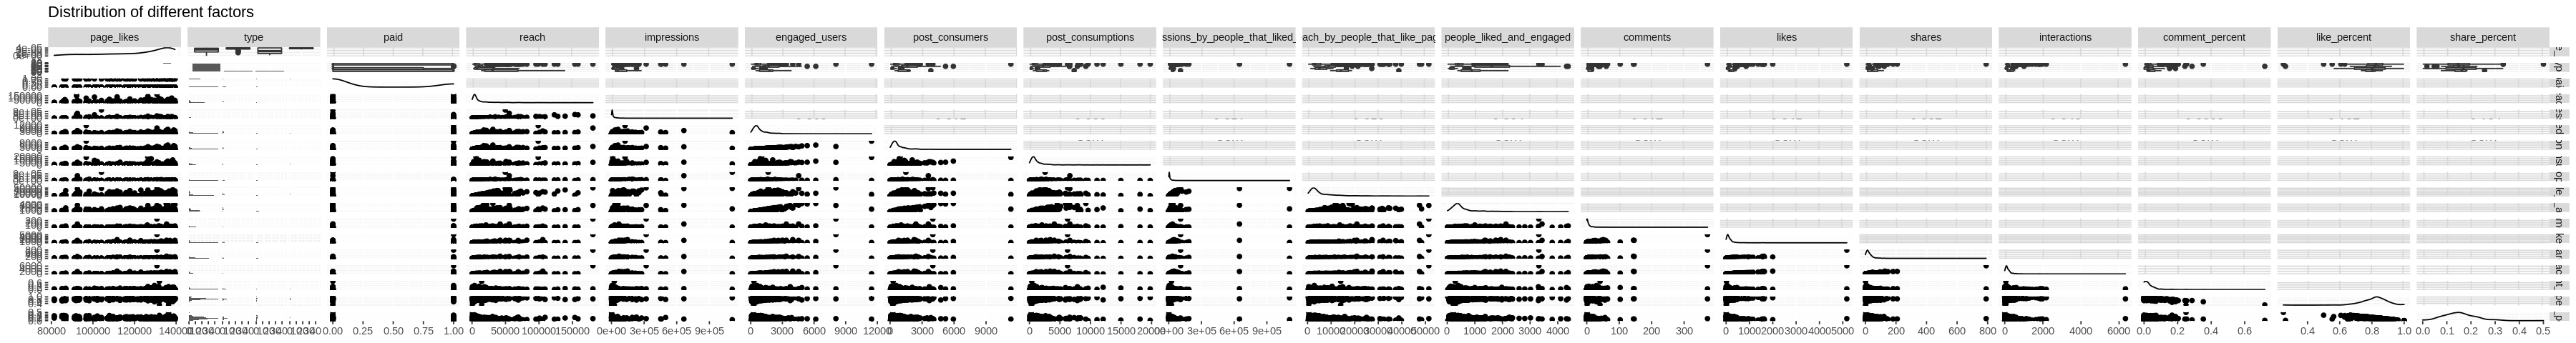

In [21]:
options(repr.plot.width = 30, repr.plot.height = 4)

fb_plot <- fb_selected_data %>% 
    ggpairs() +
    ggtitle("Distribution of different factors")
    theme(text = element_text(size=14))
# fb_plot$nrow <- 1
# fb_plot$yAxisLabels <- fb_plot$yAxisLabels[1]
fb_plot

In [10]:
summary(fb_data)

   page_likes         type              category      post_month    
 Min.   : 81370   Length:500         Min.   :1.00   Min.   : 1.000  
 1st Qu.:112676   Class :character   1st Qu.:1.00   1st Qu.: 4.000  
 Median :129600   Mode  :character   Median :2.00   Median : 7.000  
 Mean   :123194                      Mean   :1.88   Mean   : 7.038  
 3rd Qu.:136393                      3rd Qu.:3.00   3rd Qu.:10.000  
 Max.   :139441                      Max.   :3.00   Max.   :12.000  
                                                                    
  post_weekday    post_hour          paid            reach       
 Min.   :1.00   Min.   : 1.00   Min.   :0.0000   Min.   :   238  
 1st Qu.:2.00   1st Qu.: 3.00   1st Qu.:0.0000   1st Qu.:  3315  
 Median :4.00   Median : 9.00   Median :0.0000   Median :  5281  
 Mean   :4.15   Mean   : 7.84   Mean   :0.2786   Mean   : 13903  
 3rd Qu.:6.00   3rd Qu.:11.00   3rd Qu.:1.0000   3rd Qu.: 13168  
 Max.   :7.00   Max.   :23.00   Max.   :1.0000   Max